In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_excel('Sample_Superstore.xlsx')

# Display the first few rows of the dataset
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [2]:
# Check for missing values
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [3]:
# Remove duplicates
data = data.drop_duplicates()

In [4]:
# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Verify the changes
data['Order Date'].head()

0   2015-01-07
1   2015-06-13
2   2015-02-15
3   2015-05-12
4   2015-05-12
Name: Order Date, dtype: datetime64[ns]

In [5]:
# Descriptive statistics for key columns
data[['Sales', 'Profit', 'Discount', 'Quantity ordered new']].describe()

,Sales,Profit,Discount,Quantity ordered new
count,1952.000000,1952.000000,1952.000000,1952.000000
mean,985.828832,114.793859,0.048975,12.944672
std,2559.900167,1141.112387,0.031378,13.871565
min,2.250000,-16476.838000,0.000000,1.000000
25%,58.807500,-84.485400,0.020000,5.000000
50%,202.395000,1.476450,0.050000,10.000000
75%,802.945000,116.201575,0.080000,16.000000
max,45737.330000,9228.225600,0.210000,167.000000


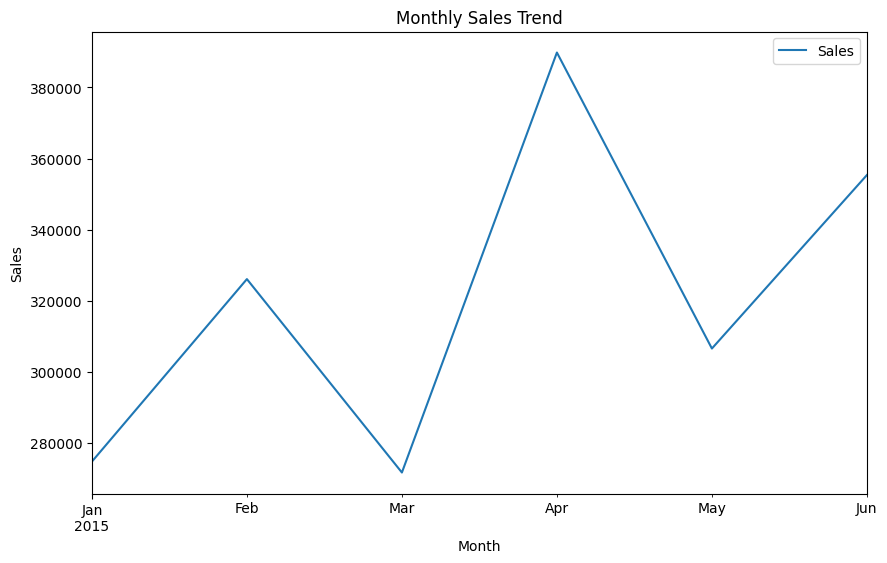

In [6]:
import matplotlib.pyplot as plt

# Group data by month and calculate total sales
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'})

# Plot the sales trend
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.savefig('monthly_sales_trend.png')  # Save the figure as an image
plt.show()

In [8]:
# Total sales
total_sales = data['Sales'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

# Total profit
total_profit = data['Profit'].sum()
print(f'Total Profit: ${total_profit:,.2f}')

# Profit margin
profit_margin = total_profit / total_sales
print(f'Profit Margin: {profit_margin * 100:.2f}%')

# Average Order Value (AOV)
unique_orders = data['Order ID'].nunique()
aov = total_sales / unique_orders
print(f'Average Order Value: ${aov:,.2f}')

Total Sales: $1,924,337.88
Total Profit: $224,077.61
Profit Margin: 11.64%
Average Order Value: $1,409.77


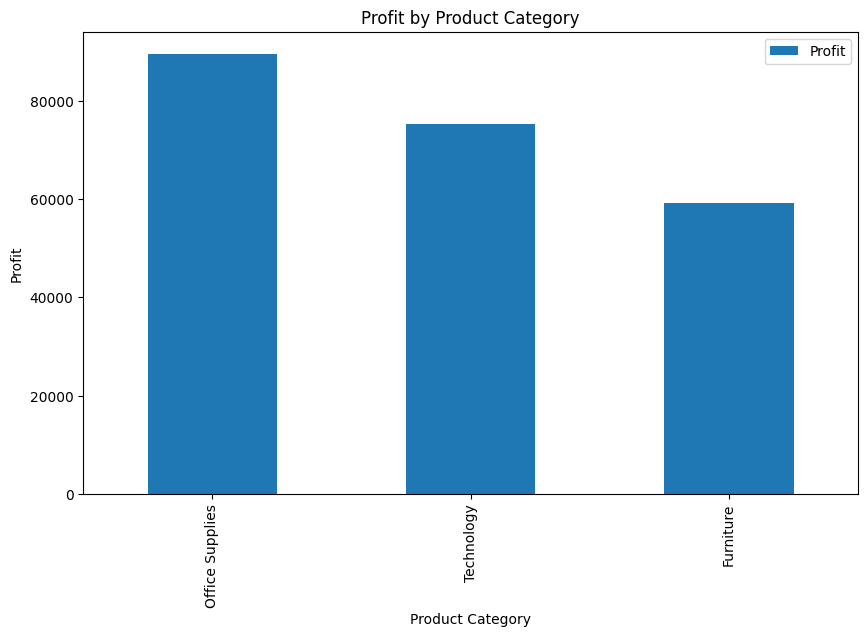

In [9]:
# Group by Product Category and calculate total profit
category_profit = data.groupby('Product Category').agg({'Profit': 'sum'}).sort_values('Profit', ascending=False)

# Plot the profit by product category
category_profit.plot(kind='bar', figsize=(10, 6), title='Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.savefig('profit_by_category.png')  # Save the figure as an image
plt.show()

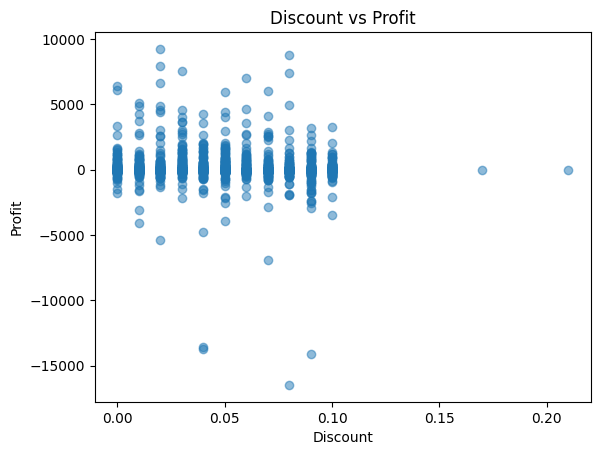

In [10]:
# Scatter plot for Discount vs Profit
plt.scatter(data['Discount'], data['Profit'], alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.savefig('discount_vs_profit.png')  # Save the figure as an image
plt.show()

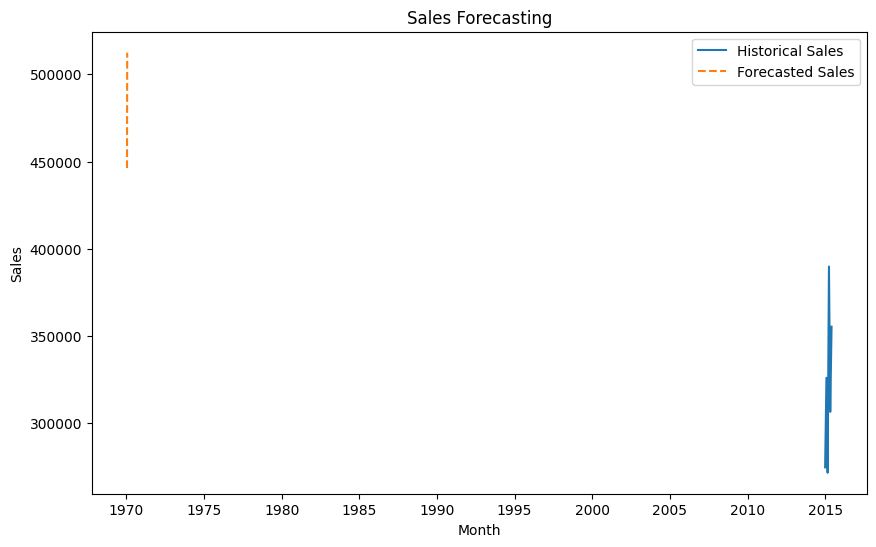

In [14]:
# Prepare data for forecasting
monthly_sales['Date'] = monthly_sales.index.astype('str')
monthly_sales['Month'] = monthly_sales.index.month

# Train a simple linear regression model
X = np.array(monthly_sales['Month']).reshape(-1, 1)
y = monthly_sales['Sales'].values
model = LinearRegression()
model.fit(X, y)

# Predict future sales (for the next 6 months)
future_months = np.array(range(13, 19)).reshape(-1, 1)
predictions = model.predict(future_months)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales')
plt.plot(range(13, 19), predictions, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.savefig('sales_forecasting.png')  # Save figure as an image
plt.show()